In [9]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
spam_text_data = pd.read_csv(io.BytesIO(uploaded["spam_text_data.csv"]))
spam_text_data.head()

Saving spam_text_data.csv to spam_text_data.csv


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Distribution of categories
category_distribution = spam_text_data['Category'].value_counts()

# Analyze basic text properties
spam_text_data['Message_length'] = spam_text_data['Message'].apply(len)
spam_text_data['Word_count'] = spam_text_data['Message'].apply(lambda x: len(x.split()))

average_message_length = spam_text_data['Message_length'].mean()
average_word_count = spam_text_data['Word_count'].mean()

category_distribution, average_message_length, average_word_count


(ham     4825
 spam     747
 Name: Category, dtype: int64,
 80.36898779612348,
 15.584170854271356)

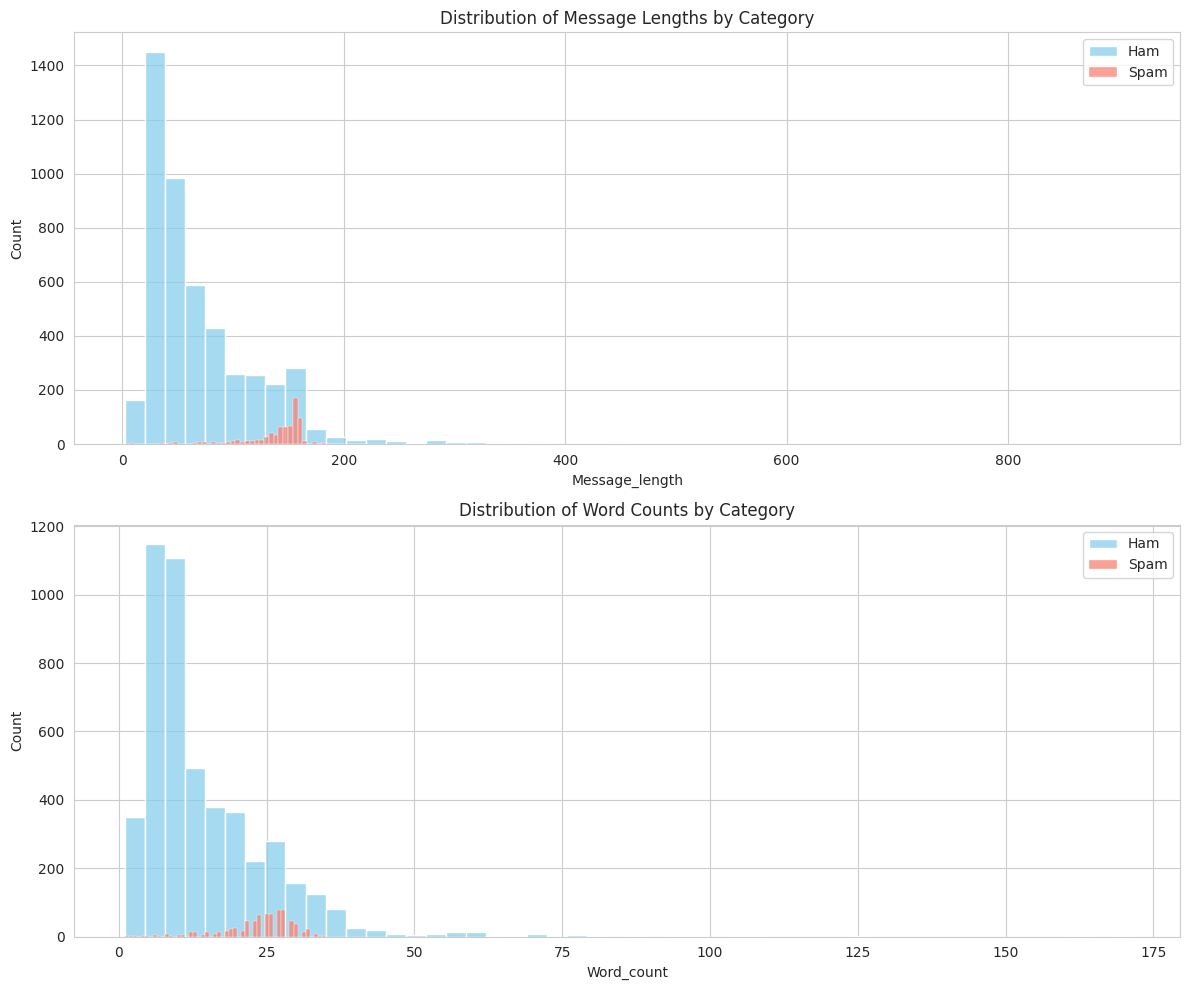

In [11]:
# Initialize a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Visualize the distribution of message lengths for both spam and ham categories
sns.histplot(spam_text_data[spam_text_data['Category'] == 'ham']['Message_length'], bins=50, ax=axes[0], color='skyblue', label='Ham')
sns.histplot(spam_text_data[spam_text_data['Category'] == 'spam']['Message_length'], bins=50, ax=axes[0], color='salmon', label='Spam')
axes[0].set_title('Distribution of Message Lengths by Category')
axes[0].legend()

# Visualize the distribution of word counts for both categories
sns.histplot(spam_text_data[spam_text_data['Category'] == 'ham']['Word_count'], bins=50, ax=axes[1], color='skyblue', label='Ham')
sns.histplot(spam_text_data[spam_text_data['Category'] == 'spam']['Word_count'], bins=50, ax=axes[1], color='salmon', label='Spam')
axes[1].set_title('Distribution of Word Counts by Category')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

# Function to clean and preprocess text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization (split the text into words)
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply the preprocessing function to the 'Message' column
spam_text_data['Cleaned_Message'] = spam_text_data['Message'].apply(preprocess_text)

# Convert the cleaned text data into a numerical format using TF-IDF representation
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 most frequent words for computational efficiency
X_tfidf = tfidf.fit_transform(spam_text_data['Cleaned_Message'])
y = spam_text_data['Category'].map({'ham': 0, 'spam': 1})

# Display the shape of the TF-IDF matrix and the first few rows of the cleaned data
X_tfidf.shape, spam_text_data[['Message', 'Cleaned_Message']].head()


LookupError: ignored

In [13]:
# Predefined list of common English stopwords
stopwords_list = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once"
]

# Adjust the preprocessing function to use the predefined stopwords list
def preprocess_text_v2(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization (split the text into words)
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    return ' '.join(tokens)

# Apply the adjusted preprocessing function to the 'Message' column
spam_text_data['Cleaned_Message_v2'] = spam_text_data['Message'].apply(preprocess_text_v2)

# Convert the cleaned text data into a numerical format using TF-IDF representation
X_tfidf = tfidf.fit_transform(spam_text_data['Cleaned_Message_v2'])

# Display the shape of the TF-IDF matrix and the first few rows of the cleaned data
X_tfidf.shape, spam_text_data[['Message', 'Cleaned_Message_v2']].head()


NameError: ignored

In [14]:
# Redefine the TF-IDF vectorizer and then transform the cleaned text data
tfidf = TfidfVectorizer(max_features=5000)  # Limiting to 5000 most frequent words for computational efficiency
X_tfidf = tfidf.fit_transform(spam_text_data['Cleaned_Message_v2'])

# Display the shape of the TF-IDF matrix and the first few rows of the cleaned data
X_tfidf.shape, spam_text_data[['Message', 'Cleaned_Message_v2']].head()


((5572, 5000),
                                              Message  \
 0  Go until jurong point, crazy.. Available only ...   
 1                      Ok lar... Joking wif u oni...   
 2  Free entry in 2 a wkly comp to win FA Cup fina...   
 3  U dun say so early hor... U c already then say...   
 4  Nah I don't think he goes to usf, he lives aro...   
 
                                   Cleaned_Message_v2  
 0  go jurong point crazy available only bugis n g...  
 1                            ok lar joking wif u oni  
 2  free entry 2 wkly comp win fa cup final tkts 2...  
 3             u dun say so early hor u c already say  
 4   nah dont think goes usf lives around here though  )

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


ValueError: ignored

In [16]:
# Ensure the target variable 'y' has the correct length
y = spam_text_data['Category'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4457, 5000), (1115, 5000), (4457,), (1115,))

In [17]:
# Train a logistic regression model
logreg_spam = LogisticRegression(max_iter=1000)
logreg_spam.fit(X_train, y_train)

# Predictions on the test set
y_pred_spam = logreg_spam.predict(X_test)

# Assess performance
accuracy_spam = accuracy_score(y_test, y_pred_spam)
class_report_spam = classification_report(y_test, y_pred_spam)
conf_matrix_spam = confusion_matrix(y_test, y_pred_spam)

accuracy_spam, class_report_spam, conf_matrix_spam


(0.9596412556053812,
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       966\n           1       0.98      0.71      0.82       149\n\n    accuracy                           0.96      1115\n   macro avg       0.97      0.85      0.90      1115\nweighted avg       0.96      0.96      0.96      1115\n',
 array([[964,   2],
        [ 43, 106]]))

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

# Initialize models
naive_bayes = MultinomialNB()
svc_spam = SVC(kernel='linear', random_state=42)
random_forest_spam = RandomForestClassifier(random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)

# Dictionary of models
models_spam = {
    'Naive Bayes': naive_bayes,
    'SVC': svc_spam,
    'Random Forest': random_forest_spam,
    'Gradient Boosted Trees': grad_boost
}

# Train each model and assess its performance
model_results_spam = {}
for model_name, model in models_spam.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred_model = model.predict(X_test)

    # Accuracy and classification report
    accuracy_model = accuracy_score(y_test, y_pred_model)
    class_report_model = classification_report(y_test, y_pred_model)

    model_results_spam[model_name] = (accuracy_model, class_report_model)

model_results_spam


{'Naive Bayes': (0.9748878923766816,
  '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99       966\n           1       1.00      0.81      0.90       149\n\n    accuracy                           0.97      1115\n   macro avg       0.99      0.91      0.94      1115\nweighted avg       0.98      0.97      0.97      1115\n'),
 'SVC': (0.9838565022421525,
  '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       966\n           1       0.99      0.89      0.94       149\n\n    accuracy                           0.98      1115\n   macro avg       0.98      0.95      0.96      1115\nweighted avg       0.98      0.98      0.98      1115\n'),
 'Random Forest': (0.9802690582959641,
  '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       966\n           1       1.00      0.85      0.92       149\n\n    accuracy                           0.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svc = GridSearchCV(svc_spam, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search_svc.fit(X_train, y_train)

# Best hyperparameters and corresponding accuracy
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_svc, best_score_svc


({'C': 1, 'kernel': 'linear'}, 0.9791328833929732)

In [20]:
# Define hyperparameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation for Random Forest
grid_search_rf = GridSearchCV(random_forest_spam, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and corresponding accuracy
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf


({'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150},
 0.9748685157504291)

In [21]:
# Define hyperparameters to tune for Gradient Boosted Trees
param_grid_gbt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with 5-fold cross-validation for Gradient Boosted Trees
grid_search_gbt = GridSearchCV(grad_boost, param_grid_gbt, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search_gbt.fit(X_train, y_train)

# Best hyperparameters and corresponding accuracy
best_params_gbt = grid_search_gbt.best_params_
best_score_gbt = grid_search_gbt.best_score_

best_params_gbt, best_score_gbt


({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150},
 0.9665685253129199)

In [22]:
# Using the best hyperparameters provided by the user to evaluate the models on the test set

# Support Vector Classifier
svc_best = SVC(C=1, kernel='linear', probability=True)
svc_best.fit(X_train, y_train)
y_pred_svc = svc_best.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

# Random Forest
rf_best = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=150)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Gradient Boosted Trees
gbt_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=150)
gbt_best.fit(X_train, y_train)
y_pred_gbt = gbt_best.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
report_gbt = classification_report(y_test, y_pred_gbt)

accuracy_svc, report_svc, accuracy_rf, report_rf, accuracy_gbt, report_gbt


(0.9838565022421525,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       966\n           1       0.99      0.89      0.94       149\n\n    accuracy                           0.98      1115\n   macro avg       0.98      0.95      0.96      1115\nweighted avg       0.98      0.98      0.98      1115\n',
 0.9802690582959641,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       966\n           1       1.00      0.85      0.92       149\n\n    accuracy                           0.98      1115\n   macro avg       0.99      0.93      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n',
 0.9713004484304932,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98       966\n           1       0.94      0.84      0.89       149\n\n    accuracy                           0.97      1115\n   macro avg       0.96      0.92

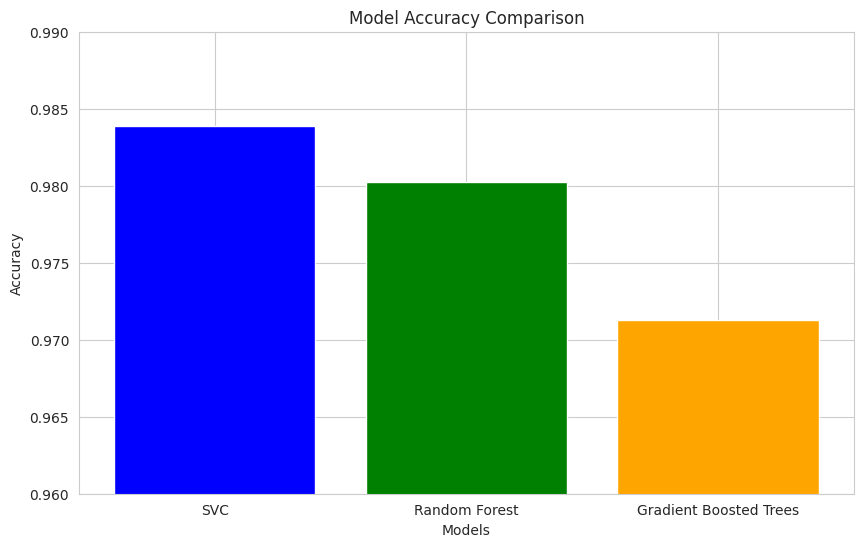

In [23]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['SVC', 'Random Forest', 'Gradient Boosted Trees']
accuracies = [accuracy_svc, accuracy_rf, accuracy_gbt]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.96, 0.99)  # set y-axis limits for better visualization
plt.show()


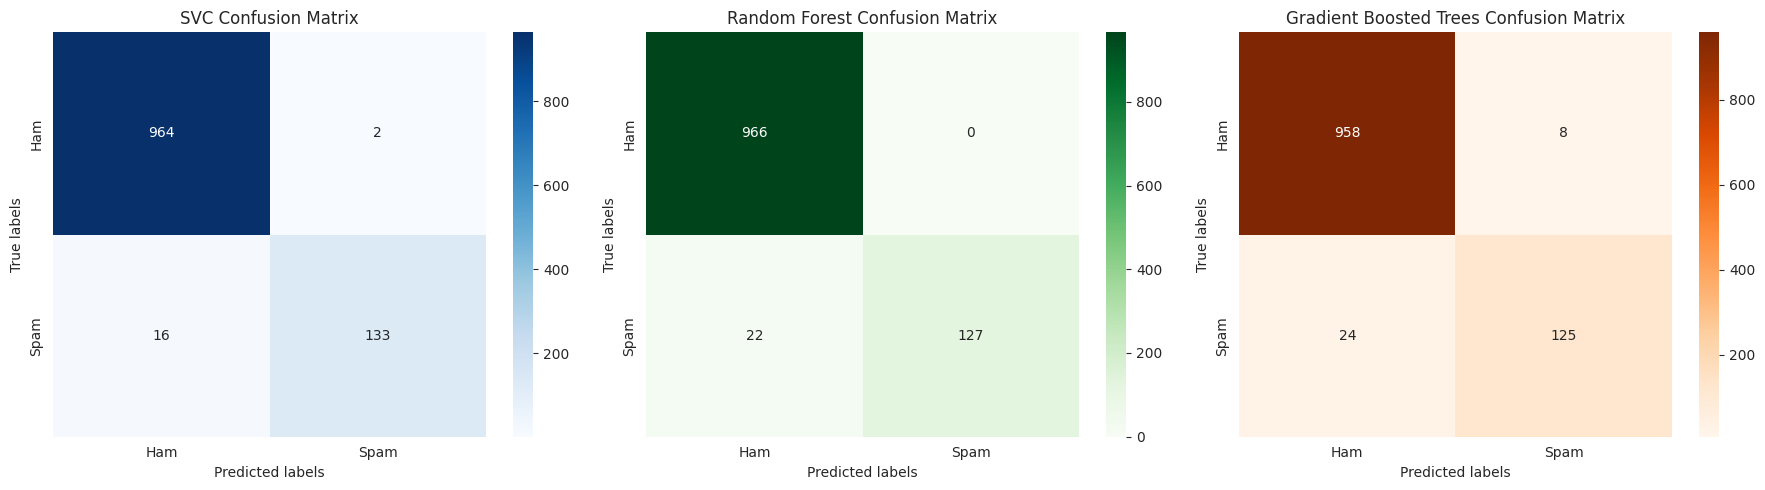

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices for the models
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_gbt = confusion_matrix(y_test, y_pred_gbt)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# SVC Confusion Matrix
sns.heatmap(conf_matrix_svc, annot=True, fmt='g', cmap='Blues', ax=ax[0])
ax[0].set_title('SVC Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Ham', 'Spam'])
ax[0].yaxis.set_ticklabels(['Ham', 'Spam'])

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Ham', 'Spam'])
ax[1].yaxis.set_ticklabels(['Ham', 'Spam'])

# Gradient Boosted Trees Confusion Matrix
sns.heatmap(conf_matrix_gbt, annot=True, fmt='g', cmap='Oranges', ax=ax[2])
ax[2].set_title('Gradient Boosted Trees Confusion Matrix')
ax[2].set_xlabel('Predicted labels')
ax[2].set_ylabel('True labels')
ax[2].xaxis.set_ticklabels(['Ham', 'Spam'])
ax[2].yaxis.set_ticklabels(['Ham', 'Spam'])

plt.tight_layout()
plt.show()
